<a href="https://colab.research.google.com/github/kasuti4327/assignment/blob/main/frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

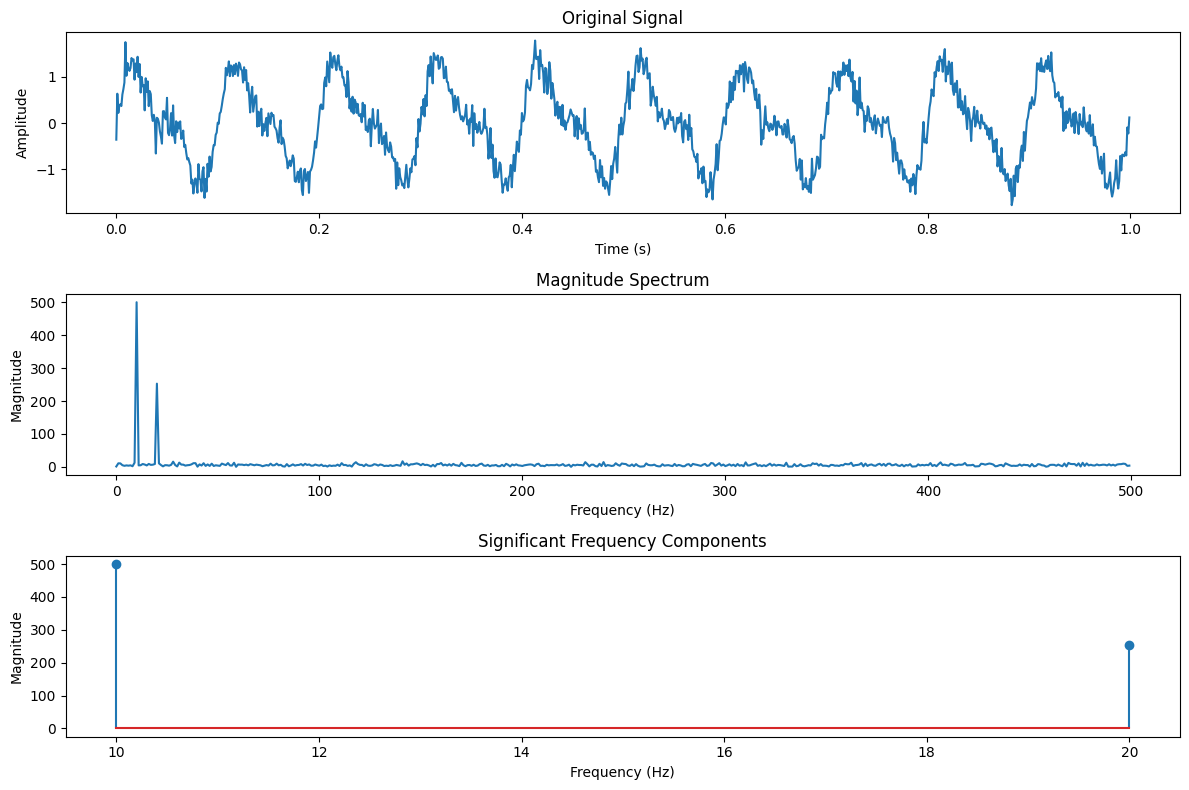

Significant frequency components:
Frequency: 10.00 Hz, Magnitude: 500.35
Frequency: 20.00 Hz, Magnitude: 252.88


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def analyze_fft(signal, sample_rate):
    """
    Compute the FFT of a signal and analyze its frequency components.

    Parameters:
    signal (array): The input signal
    sample_rate (float): The sampling rate of the signal in Hz

    Returns:
    None (displays plots)
    """
    # Compute the FFT
    fft_result = np.fft.fft(signal)

    # Compute the frequency axis
    n = len(signal)
    freq_axis = np.fft.fftfreq(n, d=1/sample_rate)

    # Compute the magnitude spectrum
    magnitude_spectrum = np.abs(fft_result)

    # Plot the original signal
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    time_axis = np.arange(n) / sample_rate
    plt.plot(time_axis, signal)
    plt.title('Original Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the magnitude spectrum
    plt.subplot(3, 1, 2)
    plt.plot(freq_axis[:n//2], magnitude_spectrum[:n//2])
    plt.title('Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    # Find and plot significant frequency components
    threshold = 0.1 * np.max(magnitude_spectrum[:n//2])
    significant_freq = freq_axis[:n//2][magnitude_spectrum[:n//2] > threshold]
    significant_mag = magnitude_spectrum[:n//2][magnitude_spectrum[:n//2] > threshold]

    plt.subplot(3, 1, 3)
    plt.stem(significant_freq, significant_mag)
    plt.title('Significant Frequency Components')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

    print("Significant frequency components:")
    for freq, mag in zip(significant_freq, significant_mag):
        print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.2f}")

# Example usage
if __name__ == "__main__":
    # Generate a sample signal
    t = np.linspace(0, 1, 1000)
    sample_rate = 1000  # Hz
    signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t) + 0.2 * np.random.randn(len(t))

    analyze_fft(signal, sample_rate)
